# Problem Statement

### Business problem overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. 

For many incumbent operators, retaining high profitable customers is the top business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In [7]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [9]:
# read the data
from google.colab import drive
drive.mount('/content/drive')

original = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/telecom_churn_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Exploration

In [11]:
churn = original.copy()
churn.head()
print(f' Shape of dataframe: {churn.shape}')

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252

 Shape of dataframe: (99999, 225)


In [12]:
# datatypes
churn.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 225 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    circle_id                 int64  
 1    loc_og_t2o_mou            float64
 2    std_og_t2o_mou            float64
 3    loc_ic_t2o_mou            float64
 4    last_date_of_month_6      object 
 5    last_date_of_month_7      object 
 6    last_date_of_month_8      object 
 7    last_date_of_month_9      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   arpu_9                    float64
 12   onnet_mou_6               float64
 13   onnet_mou_7               float64
 14   onnet_mou_8               float64
 15   onnet_mou_9               float64
 16   offnet_mou_6              float64
 17   offnet_mou_7              float64
 18   offnet_mou_8              float64
 19   offnet_mou_9              float64
 20   roam

In [13]:
# descriptive statistics
churn.describe(include='all')

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0000

In [14]:
# id columns
id_cols = ['circle_id']

#date columns
date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

#categorical columns
cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

num_cols = [column for column in churn.columns if column not in id_cols + date_cols + cat_cols]

print("#ID cols: %d \n #Date cols:%d \n #Numeric cols:%d \n #Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == churn.shape[1])

#ID cols: 1 
 #Date cols:12 
 #Numeric cols:204 
 #Category cols:8
True


## Handling missing values

In [ ]:
# look at missing value ratio in each column

round(churn.isnull().sum()/len(churn.index), 3)*100

circle_id                    0.0
loc_og_t2o_mou               1.0
std_og_t2o_mou               1.0
loc_ic_t2o_mou               1.0
last_date_of_month_6         0.0
last_date_of_month_7         0.6
last_date_of_month_8         1.1
last_date_of_month_9         1.7
arpu_6                       0.0
arpu_7                       0.0
arpu_8                       0.0
arpu_9                       0.0
onnet_mou_6                  3.9
onnet_mou_7                  3.9
onnet_mou_8                  5.4
onnet_mou_9                  7.7
offnet_mou_6                 3.9
offnet_mou_7                 3.9
offnet_mou_8                 5.4
offnet_mou_9                 7.7
roam_ic_mou_6                3.9
roam_ic_mou_7                3.9
roam_ic_mou_8                5.4
roam_ic_mou_9                7.7
roam_og_mou_6                3.9
roam_og_mou_7                3.9
roam_og_mou_8                5.4
roam_og_mou_9                7.7
loc_og_t2t_mou_6             3.9
loc_og_t2t_mou_7             3.9
loc_og_t2t

In [15]:
#recharge columns
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

churn[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


In [ ]:
# Check whether the date of the last recharge and the total recharge data value are missing together
recharge_data = ['total_rech_data_6',	'total_rech_data_7',	'total_rech_data_8', 'total_rech_data_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_9', 'date_of_last_rech_data_8']

churn[recharge_data].isnull().sum(axis=1)

0        2
1        4
2        6
3        8
4        6
        ..
99994    8
99995    8
99996    6
99997    0
99998    6
Length: 99999, dtype: int64

In the recharge variables where minumum value is 1, we can impute missing values with zeroes since it means customer didn't recharge their number that month.

In [16]:
# list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]
churn[zero_impute]

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9
0,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,252.0,252.0,252.0,NaN
1,NaN,1.0,2.0,NaN,NaN,154.0,50.0,NaN,NaN,154.0,25.0,NaN
2,NaN,NaN,NaN,1.0,NaN,NaN,NaN,46.0,NaN,NaN,NaN,46.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
99994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,2.0,NaN,NaN,NaN,39.0,NaN,NaN,NaN,25.0,NaN,NaN,NaN
99997,3.0,2.0,4.0,4.0,583.0,358.0,716.0,862.0,202.0,179.0,179.0,252.0


In [17]:
from zmq import NULL
# impute missing values with 0 for the above mentioned list of recharge columns
churn[zero_impute] = churn[zero_impute].fillna(0)

In [18]:
#recheck
churn[zero_impute].isnull().sum()

total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
total_rech_data_9     0
av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
av_rech_amt_data_9    0
max_rech_data_6       0
max_rech_data_7       0
max_rech_data_8       0
max_rech_data_9       0
dtype: int64

In [19]:
# drop id and all the date columns
print("Shape before dropping: ", churn.shape)

churn.drop(churn[date_cols], axis=1, inplace=True)
churn.drop(churn[id_cols], axis=1, inplace=True)

print("Shape after dropping: ", churn.shape)

Shape before dropping:  (99999, 225)
Shape after dropping:  (99999, 212)


In [20]:
# replace missing values with '-1' in categorical columns

churn[cat_cols] = churn[cat_cols].fillna(-1)

In [21]:
# missing value ratio
print("Missing value ratio:\n")
print(churn[cat_cols].isnull().sum()*100/churn.shape[0])

Missing value ratio:

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64


In [22]:
#remove columns with more than 70 percent missing data
initial_cols = churn.shape[1]

# 70% threshold value of missing entries
MISSING_THRESHOLD = 70000

churn.dropna(thresh = MISSING_THRESHOLD, axis = 1, inplace = True)
print(initial_cols)
print(churn.shape[1])

212
196


In [24]:
# number of columns dropped
print(initial_cols - churn.shape[1])

16


In [25]:
# missing value percentage in each column
(churn.isnull().sum()/len(churn.index)) * 100

loc_og_t2o_mou        1.018010
std_og_t2o_mou        1.018010
loc_ic_t2o_mou        1.018010
arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
arpu_9                0.000000
onnet_mou_6           3.937039
onnet_mou_7           3.859039
onnet_mou_8           5.378054
onnet_mou_9           7.745077
offnet_mou_6          3.937039
offnet_mou_7          3.859039
offnet_mou_8          5.378054
offnet_mou_9          7.745077
roam_ic_mou_6         3.937039
roam_ic_mou_7         3.859039
roam_ic_mou_8         5.378054
roam_ic_mou_9         7.745077
roam_og_mou_6         3.937039
roam_og_mou_7         3.859039
roam_og_mou_8         5.378054
roam_og_mou_9         7.745077
loc_og_t2t_mou_6      3.937039
loc_og_t2t_mou_7      3.859039
loc_og_t2t_mou_8      5.378054
loc_og_t2t_mou_9      7.745077
loc_og_t2m_mou_6      3.937039
loc_og_t2m_mou_7      3.859039
loc_og_t2m_mou_8      5.378054
loc_og_t2m_mou_9      7.745077
loc_og_t2f_mou_6      3.937039
loc_og_t

### Impute missing values using MICE (Iterative Imputer - using Linear regression technique)

In [26]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

In [27]:
churn_cols = churn.columns
lr = LinearRegression()

imp = IterativeImputer(estimator = lr, missing_values= np.nan, max_iter=1, verbose=2, imputation_order='roman', random_state=0)
churn = imp.fit_transform(churn)

[IterativeImputer] Completing matrix with shape (99999, 196)
[IterativeImputer] Ending imputation round 1/1, elapsed time 541.81
[IterativeImputer] Change: 242685.232626865, scaled tolerance: 45.735400000000006 


In [28]:
# convert imputed numpy array to pandas dataframe
churn = pd.DataFrame(churn, columns=churn_cols)
print(churn.isnull().sum()*100/churn.shape[0])

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_m

## Task 3: Feature engineering
##### Filtering high value customers

In [29]:
churn.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,-1689.887376,2474.775198,0.00,4659.04948,-814.220328,329.975584,0.00,993.060218,40408.656282,45370.823255,0.00,53158.921232,1341.372618,2801.281943,0.00,1793.280546,40.51766,27.754657,0.00,29.701704,92.097215,90.265407,0.00,90.356813,3.6825,3.74818,0.00,3.658701,-6686.323897,-7809.295231,0.00,-10347.007431,10.46546,-14.627957,0.00,-17.34594,90.200559,93.186173,0.00,92.054881,87.922835,91.295496,0.00,86.291255,1.144632,1.122505,0.00,1.0793,0.0,0.0,0.0,0.0,121.677764,126.720047,0.00,122.464233,-115.969172,-101.97583,0.0,-100.479766,-3.857786,-0.543091,0.00,3.874006,0.114461,-0.128625,0.0,0.031998,0.00,0.00,0.00,0.00,52.898804,46.508559,0.16,52.525453,107.274179,106.966791,4.13,106.142875,12.058415,12.586564,1.15,12.18915,70.291939,61.000157,5.44,65.701981,23.164737,23.188036,0.00,24.224263,21.882167,22.687395,0.00,19.750447,2.225071,2.279487,0.00,2.178639,0.0,0.0,0.0,0.0,1.983342,1.792973,0.00,0.794698,0.00,0.00,5.44,0.00,-65.562116,-63.374221,0.0,-67.610793,1.693305,3.205359,0.0,7.400073,0.433846,0.724646,0.0,0.947515,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.

In [32]:
#total recharge June
churn['june_data_recharge'] = churn['total_rech_data_6'] * churn['av_rech_amt_data_6']
churn['june_total_recharge'] = churn['total_rech_amt_6'] + churn['june_data_recharge']

#total recharge July
churn['july_data_recharge'] = churn['total_rech_data_7'] * churn['av_rech_amt_data_7']
churn['july_total_recharge'] = churn['total_rech_amt_7'] + churn['july_data_recharge']

# average
churn['total_recharge'] = (churn['june_total_recharge'] + churn['july_total_recharge'])/2

In [33]:
print(churn['total_recharge'].describe())

count    99999.000000
mean       485.328068
std        869.423594
min          0.000000
25%        128.000000
50%        275.000000
75%        553.000000
max      61236.000000
Name: total_recharge, dtype: float64


In [34]:
# keep only high value customers (above 70th percentile average data recharge amount of June and July)
total_70th_percentile = churn['total_recharge'].quantile(0.70)
churn = churn[churn['total_recharge'] >= total_70th_percentile]

print(total_70th_percentile)

478.0


In [35]:
# delete variables created to filter high-value customers
churn.drop(columns = ['june_total_recharge', 'july_total_recharge', 'june_data_recharge', 'july_data_recharge', 'total_recharge'], inplace=True)
churn.shape

(30001, 196)

### Derive churn (target variable) using September month

In [36]:
# total incoming and outgoing minutes of usage for the month of September
churn['usage'] = churn['total_ic_mou_9'] + churn['total_og_mou_9']

#total volumn of 2g and 3g data consumption for the month of September
churn['data_usage'] = churn['vol_2g_mb_9'] + churn['vol_3g_mb_9']


# those who have not used either calls or internet in the month of September are customers who have churned
# 0 - not churn, 1 - churn

churn['churn_status'] = (np.where((churn.usage == 0) & (churn.data_usage == 0), 1, 0))

churn.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,usage,data_usage,churn_status
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,-1689.887376,2474.775198,0.00,4659.04948,-814.220328,329.975584,0.00,993.060218,40408.656282,45370.823255,0.00,53158.921232,1341.372618,2801.281943,0.00,1793.280546,40.51766,27.754657,0.00,29.701704,92.097215,90.265407,0.00,90.356813,3.6825,3.74818,0.00,3.658701,-6686.323897,-7809.295231,0.00,-10347.007431,10.46546,-14.627957,0.00,-17.345940,90.200559,93.186173,0.00,92.054881,87.922835,91.295496,0.00,86.291255,1.144632,1.122505,0.00,1.079300,0.0,0.0,0.0,0.0,121.677764,126.720047,0.00,122.464233,-115.969172,-101.97583,0.00,-100.479766,-3.857786,-0.543091,0.00,3.874006,0.114461,-0.128625,0.0,0.031998,0.00,0.00,0.00,0.00,52.898804,46.508559,0.16,52.525453,107.274179,106.966791,4.13,106.142875,12.058415,12.586564,1.15,12.189150,70.291939,61.000157,5.44,65.701981,23.164737,23.188036,0.00,24.224263,21.882167,22.687395,0.00,19.750447,2.225071,2.279487,0.00,2.178639,0.0,0.0,0.0,0.0,1.983342,1.792973,0.00,0.794698,0.00,0.00,5.44,0.00,-65.562116,-63.374221,0.0,-67.610793,1.693305,3.205359,0.00,7.400073,0.433846,0.724646,0.00,0.947515,4.0,3.0,2.0

In [37]:
churn.churn_status.value_counts()

0    27560
1     2441
Name: churn_status, dtype: int64

In [38]:
# delete derived variables
churn = churn.drop(columns = ['data_usage', 'usage'])

In [40]:
#churn ratio
round(churn['churn_status'].sum()/len(churn.index) * 100, 2)

8.14

In [41]:
churn.shape

(30001, 197)

Let's derive some variables. The most important feature, in this situation, can be the difference between the 8th month and the previous months. The difference can be in patterns such as usage difference or recharge value difference. Let's calculate difference variable as the difference between 8th month and the average of 6th and 7th month.

In [42]:
cols =  ['arpu',
         'onnet_mou',
         'offnet_mou',
         'roam_ic_mou',
         'roam_og_mou',
         'loc_og_mou',
         'std_og_mou',
         'isd_og_mou',
         'spl_og_mou',
         'total_og_mou',
         'loc_ic_mou',
         'std_ic_mou',
         'isd_ic_mou',
         'spl_ic_mou',
         'total_ic_mou',
         'total_rech_num',
         'total_rech_amt',
         'max_rech_amt',
         'total_rech_data',
         'max_rech_data',
         'av_rech_amt_data',
         'vol_2g_mb',
         'vol_3g_mb'
         ]

# New columns that hold the value of the difference between the variable value in the month of August
#and average of the variable values in the month of June and July

churn_filtered = pd.DataFrame()
churn_filtered['arpu_diff'] = np.mean(churn['arpu_6'] + churn['arpu_7']) - churn['arpu_8']
churn_filtered['onnet_mou_diff'] = np.mean(churn['onnet_mou_6'] + churn['onnet_mou_7']) - churn['onnet_mou_8']
churn_filtered['offnet_mou_diff'] = np.mean(churn['offnet_mou_6'] + churn['offnet_mou_7']) - churn['offnet_mou_8']
churn_filtered['roam_ic_mou_diff'] = np.mean(churn['roam_ic_mou_6'] + churn['roam_ic_mou_7']) - churn['roam_ic_mou_8']
churn_filtered['roam_og_mou_diff'] = np.mean(churn['roam_og_mou_6'] + churn['roam_og_mou_7']) - churn['roam_og_mou_8']
churn_filtered['loc_og_mou_diff'] = np.mean(churn['loc_og_mou_6'] + churn['loc_og_mou_7']) - churn['loc_og_mou_8']
churn_filtered['std_og_mou_diff'] = np.mean(churn['std_og_mou_6'] + churn['std_og_mou_7']) - churn['std_og_mou_8']
churn_filtered['isd_og_mou_diff'] = np.mean(churn['isd_og_mou_6'] + churn['isd_og_mou_7']) - churn['isd_og_mou_8']
churn_filtered['spl_og_mou_diff'] = np.mean(churn['spl_og_mou_6'] + churn['spl_og_mou_7']) - churn['spl_og_mou_8']
churn_filtered['total_og_mou_diff'] = np.mean(churn['total_og_mou_6'] + churn['total_og_mou_7']) - churn['total_og_mou_8']
churn_filtered['loc_ic_mou_diff'] = np.mean(churn['loc_ic_mou_6'] + churn['loc_ic_mou_7']) - churn['loc_ic_mou_8']
churn_filtered['std_ic_mou_diff'] = np.mean(churn['std_ic_mou_6'] + churn['std_ic_mou_7']) - churn['std_ic_mou_8']
churn_filtered['isd_ic_mou_diff'] = np.mean(churn['isd_ic_mou_6'] + churn['isd_ic_mou_7']) - churn['isd_ic_mou_8']
churn_filtered['spl_ic_mou_diff'] = np.mean(churn['spl_ic_mou_6'] + churn['spl_ic_mou_7']) - churn['spl_ic_mou_8']
churn_filtered['total_ic_mou_diff'] = np.mean(churn['total_ic_mou_6'] + churn['total_ic_mou_7']) - churn['total_ic_mou_8']
churn_filtered['total_rech_num_diff'] = np.mean(churn['total_rech_num_6'] + churn['total_rech_num_7']) - churn['total_rech_num_8']
churn_filtered['total_rech_amt_diff'] = np.mean(churn['total_rech_amt_6'] + churn['total_rech_amt_7']) - churn['total_rech_amt_8']
churn_filtered['max_rech_amt_diff'] = np.mean(churn['max_rech_amt_6'] + churn['max_rech_amt_7']) - churn['max_rech_amt_8']
churn_filtered['total_rech_data_diff'] = np.mean(churn['total_rech_data_6'] + churn['total_rech_data_7']) - churn['total_rech_data_8']
churn_filtered['max_rech_data_diff'] = np.mean(churn['max_rech_data_6'] + churn['max_rech_data_7']) - churn['max_rech_data_8']
churn_filtered['av_rech_amt_data_diff'] = np.mean(churn['av_rech_amt_data_6'] + churn['av_rech_amt_data_7']) - churn['av_rech_amt_data_8']
churn_filtered['vol_2g_mb_diff'] = np.mean(churn['vol_2g_mb_6'] + churn['vol_2g_mb_7']) - churn['vol_2g_mb_8']
churn_filtered['vol_3g_mb_diff'] = np.mean(churn['vol_3g_mb_6'] + churn['vol_3g_mb_7']) - churn['vol_3g_mb_8']

churn_filtered

,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,905.470027,542.24558,742.886937,1574.955855,121.246374,509.124967,715.589078,0.345265,12.847102,1238.232299,462.389987,95.903671,22.74861,-2.244565,581.267483,21.569848,1069.230359,89.48655,2.521516,-94.078631,18.436107,245.869511,604.845269
7,-2052.206973,489.95558,416.976937,1543.315855,83.186374,253.334967,637.749078,-9.664735,6.347102,888.072299,279.789987,-98.036329,-8.84139,-2.244565,157.967483,16.569848,-2316.769641,-1238.51345,3.521516,157.921369,270.436107,251.619511,714.455269
8,981.911027,507.16558,606.406937,1574.955855,121.246374,446.084967,617.309078,0.345265,2.617102,1066.672299,452.039987,95.153671,22.74861,-2.244565,570.167483,9.569848,1201.230359,311.48655,0.521516,134.921369,201.436107,251.589511,702.515269
21,481.513027,457.10558,-240.503063,1574.955855,121.246374,379.384967,-223.200922,0.345265,12.847102,169.692299,308.719987,-6.026329,22.74861,-2.244565,325.667483,-3.430152,603.230359,291.48655,3.521516,157.921369,270.436107,251.619511,714.455269
23,752.307027,508.66558,536.996937,1574.955855,121.246374,326.984967,675.979078,0.345265,-4.862898,998.752299,243.619987,38.613671,19.00861,-2.244565,288.377483,19.569848,882.230359,162.48655,1.521516,-21.078631,0.436107,251.609511,-295.464731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99981,725.799027,439.00558,681.446937,1574.955855,121.246374,358.534967,701.579078,0.345265,12.767102,1073.542299,65.249987,78.543671,22.74861,-2.244565,166.247483,20.569848,809.230359,89.48655,2.521516,-94.078631,18.436107,139.549511,-298.244731
99984,1000.566027,536.53558,724.626937,1574.955855,121.246374,492.434967,715.589078,0.345265,5.567102,1214.252299,365.019987,95.903671,22.74861,-2.244565,483.897483,14.569848,1184.230359,311.48655,-1.478484,132.921369,153.436107,49.399511,714.455269
99986,554.939027,-233.16442,147.446937,1574.955855,121.246374,-715.935033,569.799078,0.345265,3.697102,-141.777701,-168.010013,71.743671,22.74861,-2.244565,-73.302517,20.569848,1296.230359,316.48655,2.521516,132.921369,245.436107,245.149511,-212.324731
99988,717.193027,539.78558,494.556937,1574.955855,121.246374,378.644967,595.299078,0.345265,12.837102,987.442299,-676.810013,7.043671,22.74861,-2.244565,-647.122517,14.569848,817.230359,187.48655,2.521516,3.921369,116.436107,250.829511,35.715269


In [43]:
# total outgoing calls minutes of usage difference between the total OG MOU in August and average of the total OG MOU of June and July
churn_filtered['total_og_mou_diff'].describe()

count    30001.000000
mean       686.553486
std        700.478180
min     -12804.827701
25%        463.452299
50%        904.692299
75%       1165.872299
max       1238.232299
Name: total_og_mou_diff, dtype: float64

In [45]:
# delete all variables relating to 9th month

churn_new = churn.drop(columns = {'arpu_9',
         'onnet_mou_9',
         'offnet_mou_9',
         'roam_ic_mou_9',
         'roam_og_mou_9',
         'loc_og_mou_9',
         'std_og_mou_9',
         'isd_og_mou_9',
         'spl_og_mou_9',
         'total_og_mou_9',
         'loc_ic_mou_9',
         'std_ic_mou_9',
         'isd_ic_mou_9',
         'spl_ic_mou_9',
         'total_ic_mou_9',
         'total_rech_num_9',
         'total_rech_amt_9',
         'max_rech_amt_9',
         'total_rech_data_9',
         'max_rech_data_9',
         'av_rech_amt_data_9',
         'vol_2g_mb_9',
         'vol_3g_mb_9', 'night_pck_user_9', 'fb_user_9' }, axis=1)

In [47]:
# extract all names that end with 9                              
churn_new = churn_new[churn_new.columns[~churn_new.columns.str.endswith('9')]]
churn_new.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn_status
0,0.0,0.0,0.0,197.385,214.816,213.803,-1689.887376,2474.775198,0.00,-814.220328,329.975584,0.00,40408.656282,45370.823255,0.00,1341.372618,2801.281943,0.00,40.51766,27.754657,0.00,92.097215,90.265407,0.00,3.6825,3.74818,0.00,-6686.323897,-7809.295231,0.00,10.46546,-14.627957,0.00,90.200559,93.186173,0.00,87.922835,91.295496,0.00,1.144632,1.122505,0.00,0.0,0.0,0.0,121.677764,126.720047,0.00,-115.969172,-101.97583,0.00,-3.857786,-0.543091,0.00,0.114461,-0.128625,0.0,0.00,0.00,0.00,52.898804,46.508559,0.16,107.274179,106.966791,4.13,12.058415,12.586564,1.15,70.291939,61.000157,5.44,23.164737,23.188036,0.00,21.882167,22.687395,0.00,2.225071,2.279487,0.00,0.0,0.0,0.0,1.983342,1.792973,0.00,0.00,0.00,5.44,-65.562116,-63.374221,0.0,1.693305,3.205359,0.00,0.433846,0.724646,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,968.0,30.40,0.00,101.20,3.58,1
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.840000,54.680000,52.29,453.430000,567.160000,325.91,16.230000,33.490000,31.64,23.740000,12.590000,38.06,51.39000,31.380000,40.28,308.630000,447.380000,162.28,62.1300,55.14000,53.23,0.000000,0.000000,0.00,422.16000,533.910000,255.79,4.300000,23.290000,12.01,49.890000,31.760000,49.14,6.660000,20.080000,16.68,0.0,0.0,0.0,60.860000,75.140000,77.84,0.000000,0.18000,10.01,4.500000,0.000000,6.50,0.000000,0.000000,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.560000,221.490000,121.19,152.160000,101.460000,39.53,427.880000,355.230000,188.04,36.890000,11.830000,30.39,91.440000,126.990000,141.33,52.190000,34.240000,22.21,0.0,0.0,0.0,180.540000,173.080000,193.94,626.46,558.04,428.74,0.210000,0.000000,0.0,2.060000,14.530000,

###  Data Visualization

In [ ]:
print(cat_cols)

['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']


In [48]:
# ensure that all the numerical and categorical columns are of the correct data types
cat_cols_new = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
churn_new[cat_cols_new] = churn_new[cat_cols_new].astype('category')
churn[cat_cols] = churn[cat_cols].astype('category')
churn_new[cat_cols_new].dtypes
churn[cat_cols].dtypes

night_pck_user_6    category
night_pck_user_7    category
night_pck_user_8    category
fb_user_6           category
fb_user_7           category
fb_user_8           category
dtype: object

night_pck_user_6    category
night_pck_user_7    category
night_pck_user_8    category
night_pck_user_9    category
fb_user_6           category
fb_user_7           category
fb_user_8           category
fb_user_9           category
dtype: object

In [64]:
# plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariate(variable, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
        
def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.scatterplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2)

#### Univariate EDA

count     30001.000000
mean       1116.509509
std        1566.112291
min           0.000000
25%         546.000000
50%         788.000000
75%        1210.000000
max      113458.000000
dtype: float64


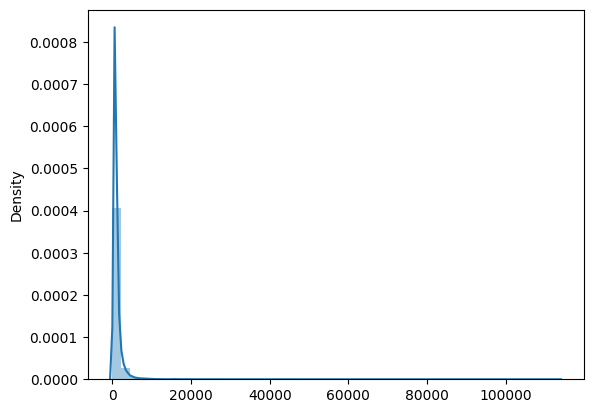

In [65]:
# average revenue per user in June
univariate(churn_new['total_rech_amt_6'] + churn_new['total_rech_data_6'] * churn_new['av_rech_amt_data_6'])

count    30001.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_og_t2o_mou, dtype: float64


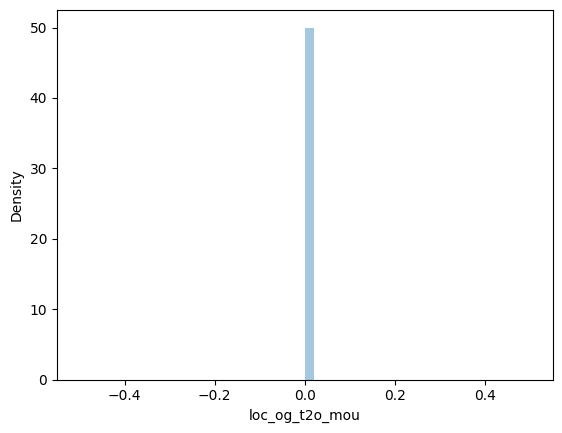

In [66]:
# minutes of usage of local (within same telecom circle) outgoing calls of Operator T to other operator fixed line
univariate(churn_new['loc_og_t2o_mou'])

count    30001.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_og_t2o_mou, dtype: float64


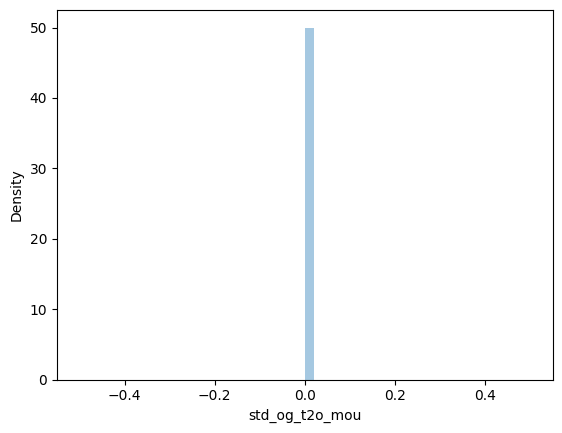

In [67]:
# minutes of usage of STD (outside the calling circle) outgoing calls of Operator T to other operator fixed line
univariate(churn_new['std_og_t2o_mou'])

count    30001.000000
mean       310.439567
std        507.057220
min          0.000000
25%         35.210000
50%        140.150000
75%        355.050000
max      10901.440000
dtype: float64


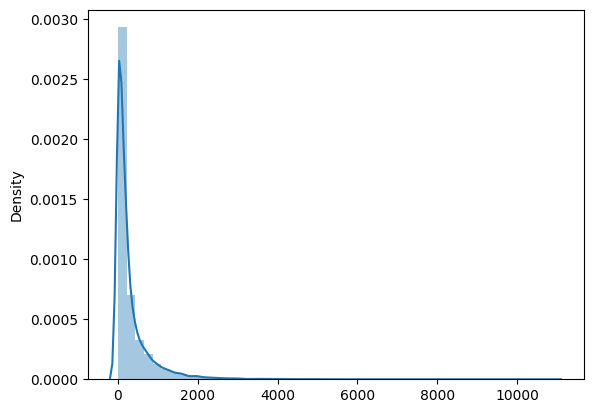

In [68]:
# minutes of usage of all kind of calls within the same operator network for the month of August

univariate(churn_new['std_og_t2t_mou_8'] + churn_new['std_ic_t2t_mou_8'] + churn_new['loc_og_t2t_mou_8'] + churn_new['loc_ic_t2t_mou_8'])

count    30001.000000
mean       463.449398
std        541.824529
min          0.000000
25%        113.470000
50%        302.541993
75%        614.320000
max      10332.300000
dtype: float64


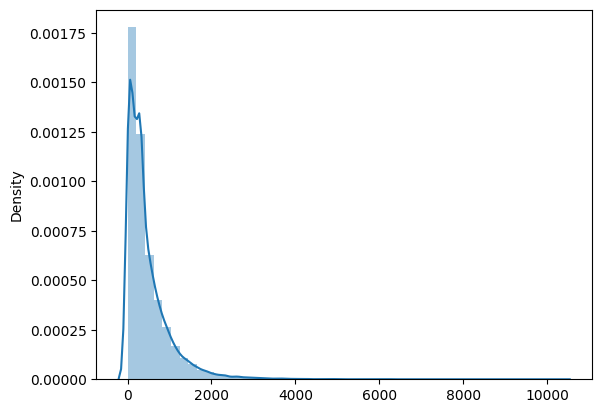

In [69]:
# minutes of usage of all kind of calls outside the operator T network for the month of September

univariate(churn['std_og_t2m_mou_9'] + churn['std_ic_t2m_mou_9'] + churn['loc_og_t2m_mou_9'] + churn['loc_ic_t2m_mou_9'])

##### Bivariate EDA

In [70]:
# Plot the relationship between whether the customer churned or not and the age on network (number of days the customer is using the operator T network)
bivariate(churn['aon'], churn['churn_status'])

TypeError: ignored

In [62]:
# Plot the relationship between the 3G volume based cost in Sept (when no specific scheme is not purchased and paid as per usage) and whether the customer churned or not
bivariate(churn['sep_vbc_3g'], churn['churn_status'])

TypeError: ignored

In [63]:
# Plot the relationship between the minutes of usage of special outgoing calls in the month of August and whether the customer churned or not
bivariate(churn['total_og_mou_8'], churn['churn_status'])

TypeError: ignored

In [72]:
# relationship between whether the customer churned or not and the night package used by users in August
pd.crosstab(churn['night_pck_user_8'], churn['churn_status'], normalize='columns')*100

churn_status,0,1
night_pck_user_8,,
-1.0,43.780842,81.196231
0.0,55.014514,18.435068
1.0,1.204644,0.368701


In [73]:
# relationship between whether the customer churned or not and the 3G service schemes with validity smaller than a month for the month of August
pd.crosstab(churn['sachet_3g_8'], churn['churn_status'])

churn_status,0,1
sachet_3g_8,,
0.0,24972,2369
1.0,1609,48
2.0,399,5
3.0,184,8
4.0,106,4
5.0,86,2
6.0,43,1
7.0,35,0
8.0,28,2


#### Outlier Capping

In [74]:
# function for capping outliers
def cap_outliers(array):
    quantile_75 = np.quantile(array, 0.75)
    quantile_25 = np.quantile(array, 0.25)
    iq_range = quantile_75 - quantile_25

    upper_limit = quantile_75 + 1.5* iq_range
    lower_limit = quantile_25 - 1.5* iq_range

    array[array > upper_limit] = upper_limit
    array[array < lower_limit] = lower_limit
    
    return array

In [76]:
# # example of capping
# sample_array = list(range(100))

# # add outliers to the data
# sample_array[0] = -9999
# sample_array[99] = 9999

# # cap outliers
# sample_array = np.array(sample_array)
# print("Array after capping outliers: \n", cap_outliers(sample_array))

In [78]:
# cap outliers
num_cols = [column for column in churn_new.columns if column not in id_cols + date_cols + cat_cols_new]
churn_new[num_cols] = cap_outliers(churn_new[num_cols])
churn_new.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn_status
0,0.0,0.0,0.0,197.385,212.525,212.525,-127.515,212.525,0.00,-127.515,212.525,0.000,212.525,212.525,0.00,212.525,212.525,0.00,40.51766,27.754657,0.00,92.097215,90.265407,0.00,3.6825,3.74818,0.00,-127.515,-127.515,0.00,10.46546,-14.627957,0.000,90.200559,93.186173,0.00,87.922835,91.295496,0.000,1.144632,1.122505,0.00,0.0,0.0,0.0,121.677764,126.720047,0.000,-115.969172,-101.97583,0.00,-3.857786,-0.543091,0.00,0.114461,-0.128625,0.0,0.000,0.000,0.000,52.898804,46.508559,0.16,107.274179,106.966791,4.13,12.058415,12.586564,1.15,70.291939,61.000157,5.440,23.164737,23.188036,0.00,21.882167,22.687395,0.00,2.225071,2.279487,0.00,0.0,0.0,0.0,1.983342,1.792973,0.00,0.000,0.000,5.440,-65.562116,-63.374221,0.0,1.693305,3.205359,0.00,0.433846,0.724646,0.00,4.0,3.0,2.0,212.525,212.525,212.525,212.525,212.525,212.525,212.525,212.525,212.525,1.0,1.0,1.0,212.525,212.525,212.525,212.525,212.525,212.525,30.13,1.320,5.75,83.57,150.760,109.610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,212.525,30.40,0.000,101.20,3.58,1
7,0.0,0.0,0.0,212.525,212.525,212.525,57.840,54.680,52.29,212.525,212.525,212.525,16.230,33.490,31.64,23.740,12.590,38.06,51.39000,31.380000,40.28,212.525000,212.525000,162.28,62.1300,55.14000,53.23,0.000,0.000,0.00,212.52500,212.525000,212.525,4.300000,23.290000,12.01,49.890000,31.760000,49.140,6.660000,20.080000,16.68,0.0,0.0,0.0,60.860000,75.140000,77.840,0.000000,0.18000,10.01,4.500000,0.000000,6.50,0.000000,0.000000,0.0,212.525,212.525,212.525,58.140000,32.260000,27.31,212.525000,212.525000,121.19,152.160000,101.460000,39.53,212.525000,212.525000,188.040,36.890000,11.830000,30.39,91.440000,126.990000,141.33,52.190000,34.240000,22.21,0.0,0.0,0.0,180.540000,173.080000,193.94,212.525,212.525,212.525,0.210000,0.000000,0.0,2.060000,14.530000,31.59,15.740000

### Supervised Classification Models and Neural Networks

In [82]:
#algorithms for sampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

#baseline linear model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#modules for hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#modules for model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import precision_score, accuracy_score, f1_score, r2_score
from sklearn.metrics import precision_recall_curve, roc_curve, recall_score


# Import methods for building neural networks
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

# Import 'KerasClassifier' from 'keras' for connecting neural networks with 'sklearn' and 'GridSearchCV'
from keras.wrappers.scikit_learn import KerasClassifier

##### Preprocessing data

In [83]:
# change churn to numeric
churn_new['churn_status'] = churn_new['churn_status'].astype('int64')
churn_new.dtypes

loc_og_t2o_mou         float64
std_og_t2o_mou         float64
loc_ic_t2o_mou         float64
arpu_6                 float64
arpu_7                 float64
arpu_8                 float64
onnet_mou_6            float64
onnet_mou_7            float64
onnet_mou_8            float64
offnet_mou_6           float64
offnet_mou_7           float64
offnet_mou_8           float64
roam_ic_mou_6          float64
roam_ic_mou_7          float64
roam_ic_mou_8          float64
roam_og_mou_6          float64
roam_og_mou_7          float64
roam_og_mou_8          float64
loc_og_t2t_mou_6       float64
loc_og_t2t_mou_7       float64
loc_og_t2t_mou_8       float64
loc_og_t2m_mou_6       float64
loc_og_t2m_mou_7       float64
loc_og_t2m_mou_8       float64
loc_og_t2f_mou_6       float64
loc_og_t2f_mou_7       float64
loc_og_t2f_mou_8       float64
loc_og_t2c_mou_6       float64
loc_og_t2c_mou_7       float64
loc_og_t2c_mou_8       float64
loc_og_mou_6           float64
loc_og_mou_7           float64
loc_og_m

In [84]:
# Extract input and output data
y = churn_new['churn_status']
X = churn_new.iloc[:,:-1]

In [85]:
# dummies for categorical variables
X = pd.get_dummies(X, drop_first=True)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4, test_size=0.20)

# shapes of train and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24000, 155)
(6001, 155)
(24000,)
(6001,)


In [87]:
y_train.value_counts()

0    22059
1     1941
Name: churn_status, dtype: int64

In [88]:
# random under sampling using imblearn
rus = RandomUnderSampler(random_state=1)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

In [89]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.3, random_state=42, stratify=y_rus)
y_train_rus.value_counts()

1    1359
0    1358
Name: churn_status, dtype: int64

In [91]:
# random over sampling with imblearn
ros = RandomOverSampler(random_state=1)
X_ros, y_ros = ros.fit_resample(X_train,y_train)

In [92]:
#train Test split
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.2, stratify=y_ros, random_state=42)
y_train_ros.value_counts()

1    17647
0    17647
Name: churn_status, dtype: int64

## Logistic Regression

In [93]:
model_name = 'Logistic Regression - without balancing'

lr = LogisticRegression(penalty = 'none', solver='lbfgs', random_state=0, max_iter=100).fit(X_train, y_train)
train_y_pred = lr.predict(X_train)
test_y_pred = lr.predict(X_test)

# Evaluating the accuracy of the training and validation sets

train_acc = accuracy_score(y_train, train_y_pred)
val_acc = accuracy_score(y_test, test_y_pred)

# Calculate the F1 score, Precision and Recall on the validation set

precision = precision_score(y_test, test_y_pred)
f_score = f1_score(y_test, test_y_pred)
recall = recall_score(y_test, test_y_pred)

# creating a dataframe to compare the performance of different models
model_eval_data = [[model_name, train_acc, val_acc, f_score, precision, recall]]
evaluate_df = pd.DataFrame(model_eval_data, columns=['Model Name', 'Training Score', 'Testing Score',
                                          'F1 Score', 'Precision', 'Recall Score'])

evaluate_df

,Model Name,Training Score,Testing Score,F1 Score,Precision,Recall Score
0,Logistic Regression - without balancing,0.939875,0.94051,0.544061,0.75265,0.426


In [94]:
model_name = 'Logistic Regression - Random Undersampling'

lrus = LogisticRegression(penalty = 'none', solver='lbfgs', random_state=0, max_iter=100).fit(X_train_rus, y_train_rus)

train_y_pred_rus = lr.predict(X_train_rus)
test_y_pred_rus = lr.predict(X_test_rus)
# Evaluating the accuracy of the training and validation sets

train_acc = accuracy_score(train_y_pred_rus, y_train_rus)
val_acc = accuracy_score(test_y_pred_rus, y_test_rus)

# Calculate the F1 score, Precision and Recall on the validation set

precision = precision_score(y_test_rus, test_y_pred_rus)
f_score = f1_score(y_test_rus, test_y_pred_rus)
recall = recall_score(y_test_rus, test_y_pred_rus)

#adding to dataframe
model_eval_data = [model_name, train_acc, val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)
evaluate_df

,Model Name,Training Score,Testing Score,F1 Score,Precision,Recall Score
0,Logistic Regression - without balancing,0.939875,0.940510,0.544061,0.752650,0.426000
1,Logistic Regression - Random Undersampling,0.692676,0.718455,0.613208,0.977444,0.446735


In [95]:
model_name = 'Logistic Regression - Random Oversampling'

lros = LogisticRegression(penalty = 'none', solver='lbfgs', random_state=0, max_iter=100).fit(X_train_ros, y_train_ros)

train_y_pred_ros = lr.predict(X_train_ros)
test_y_pred_ros = lr.predict(X_test_ros)
# Evaluating the accuracy of the training and validation sets

train_acc = accuracy_score(train_y_pred_ros, y_train_ros)
val_acc = accuracy_score(test_y_pred_ros, y_test_ros)

# Calculate the F1 score, Precision and Recall on the validation set

precision = precision_score(y_test_ros, test_y_pred_ros)
f_score = f1_score(y_test_ros, test_y_pred_ros)
recall = recall_score(y_test_ros, test_y_pred_ros)

# adding calculations to dataframe
model_eval_data = [model_name, train_acc, val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)
evaluate_df

,Model Name,Training Score,Testing Score,F1 Score,Precision,Recall Score
0,Logistic Regression - without balancing,0.939875,0.940510,0.544061,0.752650,0.426000
1,Logistic Regression - Random Undersampling,0.692676,0.718455,0.613208,0.977444,0.446735
2,Logistic Regression - Random Oversampling,0.699666,0.701949,0.583069,0.969937,0.416818


## Decision Tree

In [96]:
model_name = 'Decision Tree - without balancing'

dt = DecisionTreeClassifier(max_depth = 50, random_state = 0).fit(X_train, y_train)
# Evaluating the accuracy of the training and validation sets

train_y_pred = dt.predict(X_train)
test_y_pred = dt.predict(X_test)
# Evaluating the accuracy of the training and validation sets

train_acc = accuracy_score(train_y_pred, y_train)
val_acc = accuracy_score(test_y_pred, y_test)

# Calculate the F1 score, Precision and Recall on the validation set

precision = precision_score(y_test, test_y_pred)
f_score = f1_score(y_test, test_y_pred)
recall = recall_score(y_test, test_y_pred)

# adding calculations to dataframe
model_eval_data = [model_name, train_acc, val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)
evaluate_df

,Model Name,Training Score,Testing Score,F1 Score,Precision,Recall Score
0,Logistic Regression - without balancing,0.939875,0.940510,0.544061,0.752650,0.426000
1,Logistic Regression - Random Undersampling,0.692676,0.718455,0.613208,0.977444,0.446735
2,Logistic Regression - Random Oversampling,0.699666,0.701949,0.583069,0.969937,0.416818
3,Decision Tree - without balancing,1.000000,0.916847,0.515063,0.500945,0.530000


In [97]:
model_name = 'Decision Tree - Random Undersampling'

dt = DecisionTreeClassifier(max_depth = 50, random_state = 0).fit(X_train_rus, y_train_rus)

train_y_pred_rus = dt.predict(X_train_rus)
test_y_pred_rus = dt.predict(X_test_rus)
# Evaluating the accuracy of the training and validation sets

train_acc = accuracy_score(train_y_pred_rus, y_train_rus)
val_acc = accuracy_score(test_y_pred_rus, y_test_rus)

# Calculate the F1 score, Precision and Recall on the validation set

precision = precision_score(y_test_rus, test_y_pred_rus)
f_score = f1_score(y_test_rus, test_y_pred_rus)
recall = recall_score(y_test_rus, test_y_pred_rus)

#adding to dataframe
model_eval_data = [model_name, train_acc, val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)
evaluate_df

,Model Name,Training Score,Testing Score,F1 Score,Precision,Recall Score
0,Logistic Regression - without balancing,0.939875,0.940510,0.544061,0.752650,0.426000
1,Logistic Regression - Random Undersampling,0.692676,0.718455,0.613208,0.977444,0.446735
2,Logistic Regression - Random Oversampling,0.699666,0.701949,0.583069,0.969937,0.416818
3,Decision Tree - without balancing,1.000000,0.916847,0.515063,0.500945,0.530000
4,Decision Tree - Random Undersampling,1.000000,0.809442,0.809605,0.808219,0.810997


In [98]:
model_name = 'Decision Tree - Random Oversampling'

dt = DecisionTreeClassifier(max_depth = 50, random_state = 0).fit(X_train_ros, y_train_ros)

train_y_pred_ros = dt.predict(X_train_ros)
test_y_pred_ros = dt.predict(X_test_ros)
# Evaluating the accuracy of the training and validation sets

train_acc = accuracy_score(train_y_pred_ros, y_train_ros)
val_acc = accuracy_score(test_y_pred_ros, y_test_ros)

# Calculate the F1 score, Precision and Recall on the validation set

precision = precision_score(y_test_ros, test_y_pred_ros)
f_score = f1_score(y_test_ros, test_y_pred_ros)
recall = recall_score(y_test_ros, test_y_pred_ros)

#adding to dataframe
model_eval_data = [model_name, train_acc, val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)
evaluate_df

,Model Name,Training Score,Testing Score,F1 Score,Precision,Recall Score
0,Logistic Regression - without balancing,0.939875,0.940510,0.544061,0.752650,0.426000
1,Logistic Regression - Random Undersampling,0.692676,0.718455,0.613208,0.977444,0.446735
2,Logistic Regression - Random Oversampling,0.699666,0.701949,0.583069,0.969937,0.416818
3,Decision Tree - without balancing,1.000000,0.916847,0.515063,0.500945,0.530000
4,Decision Tree - Random Undersampling,1.000000,0.809442,0.809605,0.808219,0.810997
5,Decision Tree - Random Oversampling,0.999858,0.973595,0.974274,0.949839,1.000000


## kNN

In [99]:
model_name = 'kNN - without balancing'

knn = KNeighborsClassifier(n_neighbors = 14).fit(X_train, y_train)

# Evaluating the accuracy of the training and validation sets

train_y_pred = knn.predict(X_train)
test_y_pred = knn.predict(X_test)
# Evaluating the accuracy of the training and validation sets

train_acc = accuracy_score(train_y_pred, y_train)
val_acc = accuracy_score(test_y_pred, y_test)

# Calculate the F1 score, Precision and Recall on the validation set

precision = precision_score(y_test, test_y_pred)
f_score = f1_score(y_test, test_y_pred)
recall = recall_score(y_test, test_y_pred)

# adding calculations to dataframe
model_eval_data = [model_name, train_acc, val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)
evaluate_df

,Model Name,Training Score,Testing Score,F1 Score,Precision,Recall Score
0,Logistic Regression - without balancing,0.939875,0.940510,0.544061,0.752650,0.426000
1,Logistic Regression - Random Undersampling,0.692676,0.718455,0.613208,0.977444,0.446735
2,Logistic Regression - Random Oversampling,0.699666,0.701949,0.583069,0.969937,0.416818
3,Decision Tree - without balancing,1.000000,0.916847,0.515063,0.500945,0.530000
4,Decision Tree - Random Undersampling,1.000000,0.809442,0.809605,0.808219,0.810997
5,Decision Tree - Random Oversampling,0.999858,0.973595,0.974274,0.949839,1.000000
6,kNN - without balancing,0.942792,0.941676,0.539474,0.788462,0.410000


In [100]:
model_name = 'kNN - Random Undersampling'

knn = KNeighborsClassifier(n_neighbors=14).fit(X_train_rus, y_train_rus)

train_y_pred_rus = knn.predict(X_train_rus)
test_y_pred_rus = knn.predict(X_test_rus)
# Evaluating the accuracy of the training and validation sets

train_acc = accuracy_score(train_y_pred_rus, y_train_rus)
val_acc = accuracy_score(test_y_pred_rus, y_test_rus)

# Calculate the F1 score, Precision and Recall on the validation set

precision = precision_score(y_test_rus, test_y_pred_rus)
f_score = f1_score(y_test_rus, test_y_pred_rus)
recall = recall_score(y_test_rus, test_y_pred_rus)

#adding to dataframe
model_eval_data = [model_name, train_acc, val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)
evaluate_df

,Model Name,Training Score,Testing Score,F1 Score,Precision,Recall Score
0,Logistic Regression - without balancing,0.939875,0.940510,0.544061,0.752650,0.426000
1,Logistic Regression - Random Undersampling,0.692676,0.718455,0.613208,0.977444,0.446735
2,Logistic Regression - Random Oversampling,0.699666,0.701949,0.583069,0.969937,0.416818
3,Decision Tree - without balancing,1.000000,0.916847,0.515063,0.500945,0.530000
4,Decision Tree - Random Undersampling,1.000000,0.809442,0.809605,0.808219,0.810997
5,Decision Tree - Random Oversampling,0.999858,0.973595,0.974274,0.949839,1.000000
6,kNN - without balancing,0.942792,0.941676,0.539474,0.788462,0.410000
7,kNN - Random Undersampling,0.828487,0.832618,0.821265,0.880157,0.769759


In [101]:
model_name = 'kNN - Random Oversampling'

knn = KNeighborsClassifier(n_neighbors = 14).fit(X_train_ros, y_train_ros)

train_y_pred_ros = knn.predict(X_train_ros)
test_y_pred_ros = knn.predict(X_test_ros)
# Evaluating the accuracy of the training and validation sets

train_acc = accuracy_score(train_y_pred_ros, y_train_ros)
val_acc = accuracy_score(test_y_pred_ros, y_test_ros)

# Calculate the F1 score, Precision and Recall on the validation set

precision = precision_score(y_test_ros, test_y_pred_ros)
f_score = f1_score(y_test_ros, test_y_pred_ros)
recall = recall_score(y_test_ros, test_y_pred_ros)

#adding to dataframe
model_eval_data = [model_name, train_acc, val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)
evaluate_df

,Model Name,Training Score,Testing Score,F1 Score,Precision,Recall Score
0,Logistic Regression - without balancing,0.939875,0.940510,0.544061,0.752650,0.426000
1,Logistic Regression - Random Undersampling,0.692676,0.718455,0.613208,0.977444,0.446735
2,Logistic Regression - Random Oversampling,0.699666,0.701949,0.583069,0.969937,0.416818
3,Decision Tree - without balancing,1.000000,0.916847,0.515063,0.500945,0.530000
4,Decision Tree - Random Undersampling,1.000000,0.809442,0.809605,0.808219,0.810997
5,Decision Tree - Random Oversampling,0.999858,0.973595,0.974274,0.949839,1.000000
6,kNN - without balancing,0.942792,0.941676,0.539474,0.788462,0.410000
7,kNN - Random Undersampling,0.828487,0.832618,0.821265,0.880157,0.769759
8,kNN - Random Oversampling,0.898510,0.875453,0.882573,0.834849,0.936083


## Random Forest Classifier

In [102]:
model_name = 'Random Forest - without balancing'

rf = RandomForestClassifier(n_estimators = 200, max_depth = 5, class_weight = 'balanced', random_state = 123).fit(X_train, y_train)

# Evaluating the accuracy of the training and validation sets

train_y_pred = rf.predict(X_train)
test_y_pred = rf.predict(X_test)
# Evaluating the accuracy of the training and validation sets

train_acc = accuracy_score(train_y_pred, y_train)
val_acc = accuracy_score(test_y_pred, y_test)

# Calculate the F1 score, Precision and Recall on the validation set

precision = precision_score(y_test, test_y_pred)
f_score = f1_score(y_test, test_y_pred)
recall = recall_score(y_test, test_y_pred)

# adding calculations to dataframe
model_eval_data = [model_name, train_acc, val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)
evaluate_df

,Model Name,Training Score,Testing Score,F1 Score,Precision,Recall Score
0,Logistic Regression - without balancing,0.939875,0.940510,0.544061,0.752650,0.426000
1,Logistic Regression - Random Undersampling,0.692676,0.718455,0.613208,0.977444,0.446735
2,Logistic Regression - Random Oversampling,0.699666,0.701949,0.583069,0.969937,0.416818
3,Decision Tree - without balancing,1.000000,0.916847,0.515063,0.500945,0.530000
4,Decision Tree - Random Undersampling,1.000000,0.809442,0.809605,0.808219,0.810997
5,Decision Tree - Random Oversampling,0.999858,0.973595,0.974274,0.949839,1.000000
6,kNN - without balancing,0.942792,0.941676,0.539474,0.788462,0.410000
7,kNN - Random Undersampling,0.828487,0.832618,0.821265,0.880157,0.769759
8,kNN - Random Oversampling,0.898510,0.875453,0.882573,0.834849,0.936083
9,Random Forest - without balancing,0.907208,0.906516,0.570115,0.462112,0.744000


In [103]:
model_name = 'Random Forest - Random Undersampling'

rf = RandomForestClassifier(n_estimators=200, max_depth=5, class_weight = 'balanced', random_state=123).fit(X_train_rus, y_train_rus)

train_y_pred_rus = rf.predict(X_train_rus)
test_y_pred_rus = rf.predict(X_test_rus)
# Evaluating the accuracy of the training and validation sets

train_acc = accuracy_score(train_y_pred_rus, y_train_rus)
val_acc = accuracy_score(test_y_pred_rus, y_test_rus)

# Calculate the F1 score, Precision and Recall on the validation set

precision = precision_score(y_test_rus, test_y_pred_rus)
f_score = f1_score(y_test_rus, test_y_pred_rus)
recall = recall_score(y_test_rus, test_y_pred_rus)

#adding to dataframe
model_eval_data = [model_name, train_acc, val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)
evaluate_df

,Model Name,Training Score,Testing Score,F1 Score,Precision,Recall Score
0,Logistic Regression - without balancing,0.939875,0.940510,0.544061,0.752650,0.426000
1,Logistic Regression - Random Undersampling,0.692676,0.718455,0.613208,0.977444,0.446735
2,Logistic Regression - Random Oversampling,0.699666,0.701949,0.583069,0.969937,0.416818
3,Decision Tree - without balancing,1.000000,0.916847,0.515063,0.500945,0.530000
4,Decision Tree - Random Undersampling,1.000000,0.809442,0.809605,0.808219,0.810997
5,Decision Tree - Random Oversampling,0.999858,0.973595,0.974274,0.949839,1.000000
6,kNN - without balancing,0.942792,0.941676,0.539474,0.788462,0.410000
7,kNN - Random Undersampling,0.828487,0.832618,0.821265,0.880157,0.769759
8,kNN - Random Oversampling,0.898510,0.875453,0.882573,0.834849,0.936083
9,Random Forest - without balancing,0.907208,0.906516,0.570115,0.462112,0.744000


In [104]:
model_name = 'Random Forest - Random Oversampling'

rf = RandomForestClassifier(n_estimators=200, max_depth=5, class_weight = 'balanced', random_state=123).fit(X_train_rus, y_train_rus)


train_y_pred_ros = rf.predict(X_train_ros)
test_y_pred_ros = rf.predict(X_test_ros)
# Evaluating the accuracy of the training and validation sets

train_acc = accuracy_score(train_y_pred_ros, y_train_ros)
val_acc = accuracy_score(test_y_pred_ros, y_test_ros)

# Calculate the F1 score, Precision and Recall on the validation set

precision = precision_score(y_test_ros, test_y_pred_ros)
f_score = f1_score(y_test_ros, test_y_pred_ros)
recall = recall_score(y_test_ros, test_y_pred_ros)

#adding to dataframe
model_eval_data = [model_name, train_acc, val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)
evaluate_df

,Model Name,Training Score,Testing Score,F1 Score,Precision,Recall Score
0,Logistic Regression - without balancing,0.939875,0.940510,0.544061,0.752650,0.426000
1,Logistic Regression - Random Undersampling,0.692676,0.718455,0.613208,0.977444,0.446735
2,Logistic Regression - Random Oversampling,0.699666,0.701949,0.583069,0.969937,0.416818
3,Decision Tree - without balancing,1.000000,0.916847,0.515063,0.500945,0.530000
4,Decision Tree - Random Undersampling,1.000000,0.809442,0.809605,0.808219,0.810997
5,Decision Tree - Random Oversampling,0.999858,0.973595,0.974274,0.949839,1.000000
6,kNN - without balancing,0.942792,0.941676,0.539474,0.788462,0.410000
7,kNN - Random Undersampling,0.828487,0.832618,0.821265,0.880157,0.769759
8,kNN - Random Oversampling,0.898510,0.875453,0.882573,0.834849,0.936083
9,Random Forest - without balancing,0.907208,0.906516,0.570115,0.462112,0.744000


In [ ]:
evaluate_df

,Model Name,Training Score,Testing Score,F1 Score,Precision,Recall Score
0,Logistic Regression - without balancing,0.940711,0.938808,0.526316,0.752212,0.404762
1,Logistic Regression - Random Undersampling,0.697041,0.718491,0.611675,0.983673,0.443831
2,Logistic Regression - Random Oversampling,0.706272,0.704084,0.587363,0.969950,0.421218
3,Decision Tree - without balancing,1.000000,0.917744,0.521334,0.509863,0.533333
4,Decision Tree - Random Undersampling,1.000000,0.773689,0.768362,0.786127,0.751381
5,Decision Tree - Random Oversampling,0.998943,0.975350,0.975943,0.953017,1.000000
6,kNN - without balancing,0.943378,0.939875,0.528736,0.773700,0.401587
7,kNN - Random Undersampling,0.823669,0.812328,0.797619,0.864516,0.740331
8,kNN - Random Oversampling,0.898918,0.876027,0.881797,0.842580,0.924843
9,Random Forest - without balancing,0.906533,0.903746,0.562424,0.454902,0.736508


In this case study, the most important factor in the prediction performance of a machine learning model is that it should be able to predict the positive class as accurately as possible. This means that the false negatives and false positives are supposed to be as minimal as possible. This further means that precision and recall should be as high as possible. 

There is another factor to consider. The most important factor which can lead to a company loss is the false negatives. This is because if we predict that a customer did not churn but in reality, the customer did, the company will miss out on the data of churned customers. Hence, observing the recall factor is much more important than precision. 

## Decision Tree (HyperParameter Tuning)

In [105]:
dt = DecisionTreeClassifier(random_state = 0)
param_grid = {'max_depth': np.arange(0, 60, 5)} # Parameter range
grid = GridSearchCV(dt, param_grid, cv = 2, scoring = 'accuracy', return_train_score = False, verbose = 1)
grid_search=grid.fit(X_train_ros, y_train_ros)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


In [106]:
print('The optimal value of max_depth is', grid_search.best_params_['max_depth'])

accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

The optimal value of max_depth is 45
Accuracy for our training dataset with tuning is : 95.58%


In [107]:
# Re-fit the model with parameters obtained from GridSearchCV
dt = DecisionTreeClassifier(max_depth = 40, random_state=0).fit(X_train_ros, y_train_ros)

train_y_pred_ros = dt.predict(X_train_ros)
test_y_pred_ros = dt.predict(X_test_ros)

# Evaluating the accuracy of the training and validation sets

train_acc = accuracy_score(train_y_pred_ros, y_train_ros)
val_acc = accuracy_score(test_y_pred_ros, y_test_ros)

# Calculate the F1 score, Precision and Recall on the validation set

precision = precision_score(y_test_ros, test_y_pred_ros)
f_score = f1_score(y_test_ros, test_y_pred_ros)
recall = recall_score(y_test_ros, test_y_pred_ros)

In [ ]:
print(val_acc)
print(precision)
print(recall)

0.9708796520058
0.9449646037908198
1.0


In [108]:
# Find the importance of all the features according to the optimal model defined above
importance = dt.feature_importances_

In [109]:
for i,v in zip(churn_new.columns, importance):
  print(f' {i} : {v*100:.5f}')

 loc_og_t2o_mou : 0.00000
 std_og_t2o_mou : 0.00000
 loc_ic_t2o_mou : 0.00000
 arpu_6 : 0.14413
 arpu_7 : 0.09508
 arpu_8 : 0.40685
 onnet_mou_6 : 0.17733
 onnet_mou_7 : 0.55908
 onnet_mou_8 : 0.41357
 offnet_mou_6 : 0.08192
 offnet_mou_7 : 0.22667
 offnet_mou_8 : 0.35514
 roam_ic_mou_6 : 0.24812
 roam_ic_mou_7 : 0.16529
 roam_ic_mou_8 : 0.75900
 roam_og_mou_6 : 0.17923
 roam_og_mou_7 : 1.21000
 roam_og_mou_8 : 7.49652
 loc_og_t2t_mou_6 : 0.36509
 loc_og_t2t_mou_7 : 1.10360
 loc_og_t2t_mou_8 : 0.59972
 loc_og_t2m_mou_6 : 0.26113
 loc_og_t2m_mou_7 : 0.20917
 loc_og_t2m_mou_8 : 0.33795
 loc_og_t2f_mou_6 : 0.64565
 loc_og_t2f_mou_7 : 0.16391
 loc_og_t2f_mou_8 : 0.07865
 loc_og_t2c_mou_6 : 0.23471
 loc_og_t2c_mou_7 : 0.16669
 loc_og_t2c_mou_8 : 0.47085
 loc_og_mou_6 : 0.12287
 loc_og_mou_7 : 0.42985
 loc_og_mou_8 : 2.09270
 std_og_t2t_mou_6 : 0.21281
 std_og_t2t_mou_7 : 0.03399
 std_og_t2t_mou_8 : 0.30613
 std_og_t2m_mou_6 : 0.15773
 std_og_t2m_mou_7 : 0.09149
 std_og_t2m_mou_8 : 0.12147
 

## FeedForward Neural Network

In [110]:
def create_nn(activation_function = 'relu',
              hidden1_neurons = 256):
    nn = Sequential()

    # keras.Input is the input layer of the neural network
    input = keras.Input(shape = (150, ))

    # a hidden layer using the 'add()' and 'Dense()' methods
    nn.add(Dense(units=hidden1_neurons, activation = activation_function))

    # a hidden layer using the 'add()' and 'Dense()' methods
    nn.add(Dense(units = 64, activation = activation_function))

    # output layer using the 'add()' and 'Dense()' method
    nn.add(Dense(units=1, activation = 'sigmoid'))
    
    # Compile the model
    nn.compile(loss = 'binary_crossentropy', metrics = 'accuracy', optimizer = RMSprop(learning_rate = 0.1))
    
    return nn

In [111]:
# neural network
nn1 = create_nn()
nn1_history = nn1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 10)

nn1.summary()
print('\n')

Epoch 1/10
750/750 [==============================] - 12s 4ms/step - loss: 49.1771 - accuracy: 0.9140 - val_loss: 0.2884 - val_accuracy: 0.9167
Epoch 2/10
750/750 [==============================] - 4s 6ms/step - loss: 0.2820 - accuracy: 0.9191 - val_loss: 0.2874 - val_accuracy: 0.9167
Epoch 3/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2822 - accuracy: 0.9191 - val_loss: 0.2872 - val_accuracy: 0.9167
Epoch 4/10
750/750 [==============================] - 2s 3ms/step - loss: 0.2821 - accuracy: 0.9191 - val_loss: 0.2868 - val_accuracy: 0.9167
Epoch 5/10
750/750 [==============================] - 3s 3ms/step - loss: 0.2823 - accuracy: 0.9191 - val_loss: 0.2869 - val_accuracy: 0.9167
Epoch 6/10
750/750 [==============================] - 4s 6ms/step - loss: 0.2823 - accuracy: 0.9191 - val_loss: 0.2868 - val_accuracy: 0.9167
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2821 - accuracy: 0.9191 - val_loss: 0.2877 - val_accuracy: 0.9167
Epoc

In [112]:
# Convert neural network history into a data frame
hist = pd.DataFrame(nn1_history.history)
hist['epoch'] = nn1_history.epoch
hist['epoch'] = hist['epoch'].apply(lambda x: x + 1)
hist.set_index('epoch')

,loss,accuracy,val_loss,val_accuracy
epoch,,,,
1,49.177105,0.914000,0.288350,0.916681
2,0.282026,0.919125,0.287365,0.916681
3,0.282156,0.919125,0.287188,0.916681
4,0.282067,0.919125,0.286810,0.916681
5,0.282271,0.919125,0.286902,0.916681
6,0.282281,0.919125,0.286843,0.916681
7,0.282110,0.919125,0.287676,0.916681
8,0.282241,0.919125,0.287004,0.916681
9,0.282289,0.919125,0.286839,0.916681


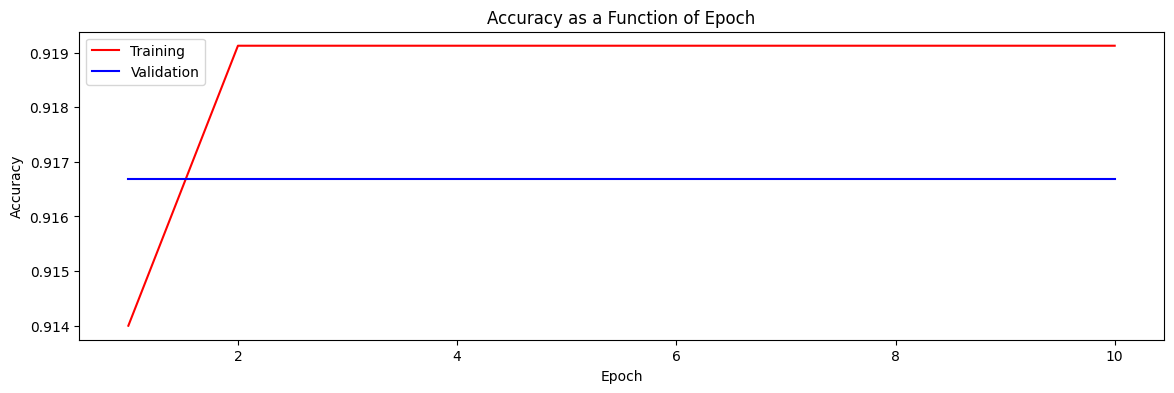

In [113]:
# View the training and validation accuracies as functions of epoch
plt.figure(figsize = (14, 4))

sns.lineplot(data = hist, x = 'epoch', y = 'accuracy', color = 'red', label = 'Training')
sns.lineplot(data = hist, x = 'epoch', y = 'val_accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Epoch');

In [ ]:
# Compute the final accuracy of the model on the validation data set using the 'evaluate()' method
performance_test = nn1.evaluate(X_test, y_test)

print('The loss value of the model on the validation data is {}'.format(performance_test[0]))
print('The accuracy of the model on the validation data is {}'.format(performance_test[1]))

235/235 [==============================] - 1s 2ms/step - loss: 0.2974 - accuracy: 0.9160
The loss value of the model on the validation data is 0.2973862588405609
The accuracy of the model on the validation data is 0.9160112142562866


### Hyperparameter Tuning of Neural Network

In [114]:
base_grid_model = KerasClassifier(build_fn = create_nn)
parameters_grid = {'activation_function': ['relu','sigmoid'],
                   'hidden1_neurons': [256, 512]}
grid = GridSearchCV(estimator = base_grid_model, param_grid = parameters_grid, cv=2, verbose=4)
grid_model = grid.fit(X_train, y_train, epochs = 10)

# optimal values of 'activation_function' and 'hidden1_neurons'
best_activation_function = grid_model.best_params_['activation_function']
best_hidden1_neurons = grid_model.best_params_['hidden1_neurons']
best_accuracy = grid_model.best_score_

print('\n The optimal value of convolution filter size is', best_activation_function)
print('\n The optimal value of maxpooling filter size is', best_hidden1_neurons)
print('\n The accuracy of the model with these optimal parameters is ', best_accuracy)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
Epoch 1/10
375/375 [==============================] - 2s 3ms/step - loss: 813.3682 - accuracy: 0.8963
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4186 - accuracy: 0.9210
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.2768 - accuracy: 0.9213
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.2772 - accuracy: 0.9213
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2768 - accuracy: 0.9213
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2770 - accuracy: 0.9213
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2765 - accuracy: 0.9213
Epoch 8/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2768 - accuracy: 0.9213
Epoch 9/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2768 - accuracy: 0.9213
Epoch 10/10
375/375 [==================

In [115]:
# Retrain the model with the optimal combination of hyperparameters
nn1 = create_nn()
grid_model = KerasClassifier(build_fn = create_nn)
parameters_grid = {'activation_function': best_activation_function,
                   'hidden1_neurons': best_hidden1_neurons}
print('\n')


nn1_history = nn1.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=10)
nn1.summary()
hist = pd.DataFrame(nn1_history.history)
hist['epoch'] = nn1_history.epoch



Epoch 1/10
750/750 [==============================] - 6s 7ms/step - loss: 67.2661 - accuracy: 0.9140 - val_loss: 0.2873 - val_accuracy: 0.9167
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2821 - accuracy: 0.9191 - val_loss: 0.2869 - val_accuracy: 0.9167
Epoch 3/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2822 - accuracy: 0.9191 - val_loss: 0.2869 - val_accuracy: 0.9167
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2822 - accuracy: 0.9191 - val_loss: 0.2868 - val_accuracy: 0.9167
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2823 - accuracy: 0.9191 - val_loss: 0.2957 - val_accuracy: 0.9167
Epoch 6/10
750/750 [==============================] - 3s 3ms/step - loss: 0.2822 - accuracy: 0.9191 - val_loss: 0.2891 - val_accuracy: 0.9167
Epoch 7/10
750/750 [==============================] - 3s 3ms/step - loss: 0.2823 - accuracy: 0.9191 - val_loss: 0.2876 - val_accuracy: 0.9167
Epo

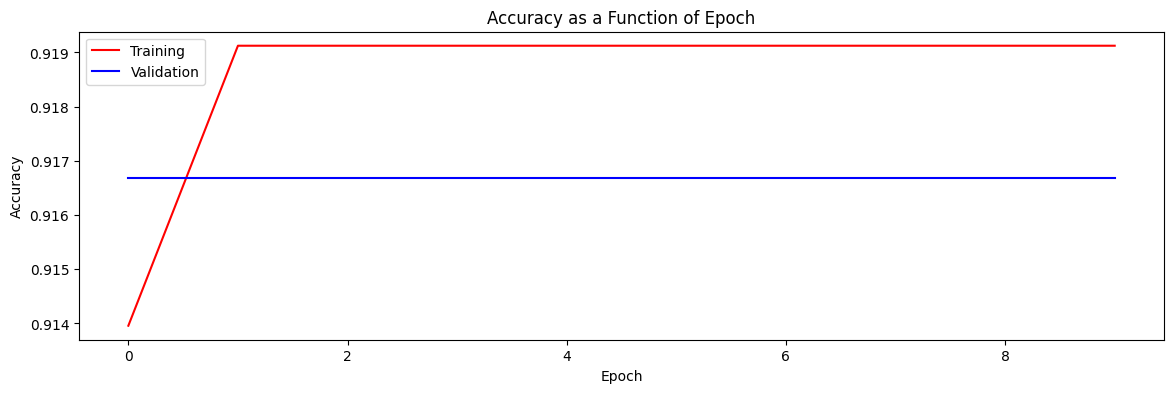

In [116]:
# View the training and validation accuracies as functions of epoch
plt.figure(figsize = (14, 4))

sns.lineplot(data = hist, x = 'epoch', y = 'accuracy', color = 'red', label = 'Training')
sns.lineplot(data = hist, x = 'epoch', y = 'val_accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Epoch');

In [117]:
# accuracy of the model on the testing data set using the 'evaluate()' method
performance_test = nn1.evaluate(X_test, y_test)

print('The loss value of the model on the test data is {}'.format(performance_test[0]))
print('The accuracy of the model on the test data is {}'.format(performance_test[1]))

188/188 [==============================] - 1s 3ms/step - loss: 0.2871 - accuracy: 0.9167
The loss value of the model on the test data is 0.28708744049072266
The accuracy of the model on the test data is 0.9166805744171143


## Business Insights: Misclassification Costs
Our first step is to understand the current profitability of the telecomminucation service program, and then to is to estimate the impact of our model. We are going to use misclassification costs to study the impact. 

We are going to use \$500 as an approximation company loss for the false negative cost, and \$300 company loss for the false positive cost. Note: We are interested in finding the best cut-off that will maximize the benefit of our machine learning model.


In [118]:
# false positive and false negative missclassification cost here
fn_cost = 500
fp_cost = 300

train_mc_cost_0 = np.count_nonzero(y_train == 0) * fp_cost
val_mc_cost_0 = np.count_nonzero(y_test == 0) * fp_cost

In [119]:
# using the most optimal machine learning model
dt = DecisionTreeClassifier(max_depth = 40, random_state=0).fit(X_train_ros, y_train_ros)

train_y_pred_ros = dt.predict(X_train_ros)
test_y_pred_ros = dt.predict(X_test_ros)

# Evaluating the accuracy of the training and validation sets

train_acc = accuracy_score(train_y_pred_ros, y_train_ros)
val_acc = accuracy_score(test_y_pred_ros, y_test_ros)

# Calculate the F1 score, Precision and Recall on the validation set

precision = precision_score(y_test_ros, test_y_pred_ros)
f_score = f1_score(y_test_ros, test_y_pred_ros)
recall = recall_score(y_test_ros, test_y_pred_ros)

# creating a dataframe to compare the performance of different models
new_model_eval_data = [[model_name, train_acc, val_acc, f_score, precision, recall]]
new_evaluate_df = pd.DataFrame(new_model_eval_data, columns=['Model Name', 'Training Score', 'Testing Score',
                                          'F1 Score', 'Precision', 'Recall'])

In [120]:
new_evaluate_df

,Model Name,Training Score,Testing Score,F1 Score,Precision,Recall
0,Random Forest - Random Oversampling,0.99728,0.972688,0.973414,0.948205,1.0


In [121]:
# false positive and false negative classifications
train_cf = confusion_matrix(y_train_ros, train_y_pred_ros)
val_cf = confusion_matrix(y_test_ros, test_y_pred_ros)

# false positives and false negatives from the confusion matrices 'train_cf' and 'val_cf'
train_fp_count = train_cf[0,1]
train_fn_count = train_cf[1,0]
val_fp_count = val_cf[0,1]
val_fn_count = val_cf[1,0]

# misclassification cost with the default cut-off of 0.5
train_mc_cost = train_fp_count * fp_cost + train_fn_count * fn_cost
val_mc_cost = val_fp_count * fp_cost + val_fn_count * fn_cost
print('The misclassification cost on the training data = {} dollars'.format(train_mc_cost))
print('The misclassification cost on the validation data = {} dollars'.format(val_mc_cost))

The misclassification cost on the training data = 28800 dollars
The misclassification cost on the validation data = 72300 dollars


In [123]:
# Predict probabilities for the training set and retain them for only positive outcomes
lr_probs_train = dt.predict_proba(X_train_ros)[:, 1]

# Predict probabilities for the validation set and retain them for only positive outcomes
lr_probs_val = dt.predict_proba(X_test_ros)[:, 1]

In [128]:
# misclassification costs for different values of cut-off probability
cost_train = []
cost_val=[]

for cutoff in np.arange(0, 1, 0.01):
    curr_preds = confusion_matrix(y_train_ros, train_y_pred_ros)
    curr_fp_count = curr_preds[0,1]
    curr_fn_count = curr_preds[1,0]

    curr_misclassification_cost = curr_fp_count * fp_cost + curr_fn_count * fn_cost
    cost_train.append(curr_misclassification_cost)

    curr_preds = confusion_matrix(y_test_ros, test_y_pred_ros)
    curr_fp_count = curr_preds[0, 1]
    curr_fn_count = curr_preds[1, 0]

    curr_misclassification_cost = curr_fp_count * fp_cost + curr_fn_count * fn_cost
    cost_val.append(curr_misclassification_cost)

# X values (cut-off values)
cutoffs = np.arange(0, 1, 0.01)

# Find the minimum misclassification cost and its associated cut-off value based on the training data
best_cost = min(cost_train)
best_cutoff = cutoffs[cost_train.index(best_cost)]

#apply the cut-off value to the validation data
best_valcost = cost_val[cost_train.index(best_cost)]


print('Best Misclassification Cost on the training is %.2f' % (best_cost));
print('Applying that cut-off to the validation data results in Misclassification Cost of %.2f ' % best_valcost);

Best Misclassification Cost on the training is 28800.00
Applying that cut-off to the validation data results in Misclassification Cost of 72300.00 


#RECOMMENDATIONS

##### The most important features for the company to look on are roaming outgoing calls in july and august. 
##### The other features that are also relevant to determine churn are local outgoing calls in august, local incoming t2m calls in june and august and std incoming t2m calls in july. 
##### contacting above high risk customers may help to reduce the churn rate.